In [1]:
# imports libraries
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math
import sklearn.decomposition as dcmp
import pyaudio

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS
import audio

In [2]:
Fs = 48000

rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath,'*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])

filt = (None,None,['18']) # Selects the bent 1 cameras during motion 18

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);

# Reads the .wav files from the list generted by getKeys
(names,cDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


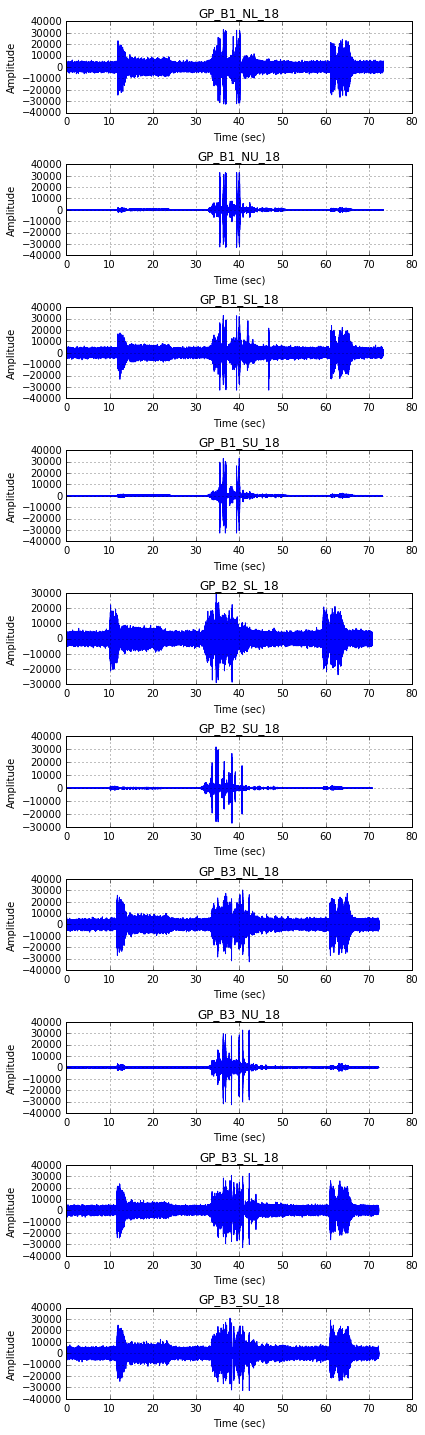

In [3]:

fig = plt.figure(figsize= (6,20))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(1/Fs*np.linspace(1,len(cDataset[names[ii]][:,0]),len(cDataset[names[ii]][:,0])),cDataset[names[ii]][:,0],'b')
    #plt.xlim((30,50))
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude')
    plt.title(names[ii])
    plt.grid()
    
fig.tight_layout()  

plt.draw()
    
plt.savefig('rawsignal.pdf',format = 'pdf', transparent = True)

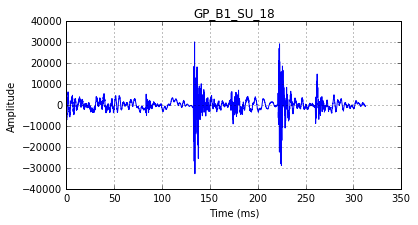

In [4]:
thisrange = range(1760000,1775000)

snippet = np.array(cDataset[names[3]][thisrange,0])

audio.play_sound(48000,snippet)
time = 1000/Fs*np.linspace(1,len(thisrange),len(thisrange))

fig = plt.figure(figsize= (6,3))
plt.plot(time,snippet,'b') # milliseconds
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title(names[3])
plt.grid()

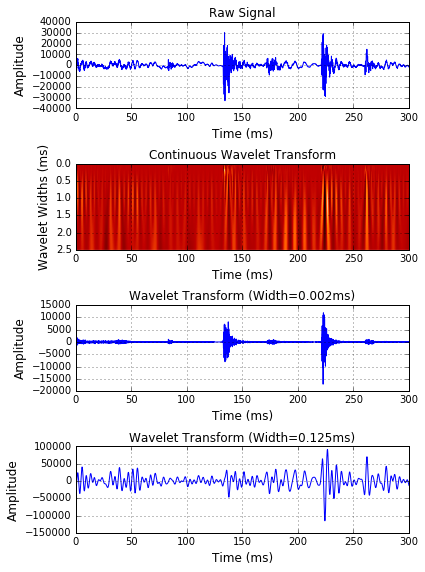

In [14]:
# takes the continuous wavelet transform and plots the results

fig1 = plt.figure(figsize= (6,8))


widths = np.linspace(1,120,120)
cwtmatr = signal.cwt(snippet, signal.ricker, widths)

plt.subplot(4,1,1)
plt.plot(time,snippet)
plt.xlim((0,300))
plt.xlabel('Time (ms)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.title('Raw Signal')
plt.grid()

plt.subplot(4,1,2)
plt.imshow(cwtmatr, interpolation='none', extent=[0,1000/Fs*len(snippet),1000/Fs*max(widths),0], cmap=plt.cm.gist_heat, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlim((0,300))
plt.xlabel('Time (ms)',fontsize = 12)
plt.ylabel('Wavelet Widths (ms)',fontsize = 12)
plt.title('Continuous Wavelet Transform')
plt.grid()

plt.subplot(4,1,3)
plt.plot(time,cwtmatr[0])
plt.xlim((0,300))
plt.xlabel('Time (ms)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.title('Wavelet Transform (Width='+ str(np.round(100/Fs*widths[0],3)) +'ms)')
plt.grid()

plt.subplot(4,1,4)
plt.plot(time,cwtmatr[59])
plt.xlim((0,300))
plt.xlabel('Time (ms)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.title('Wavelet Transform (Width='+ str(np.round(100/Fs*widths[59],3)) + 'ms)')
plt.grid()

fig1.tight_layout() 

plt.savefig('waveletTrans.pdf',format = 'pdf', transparent = True)

In [83]:
widths = np.linspace(4,40,9)
cwtmatr = signal.cwt(snippet, signal.ricker, widths)

In [14]:
print(len(cwtmatr[1]))

15000


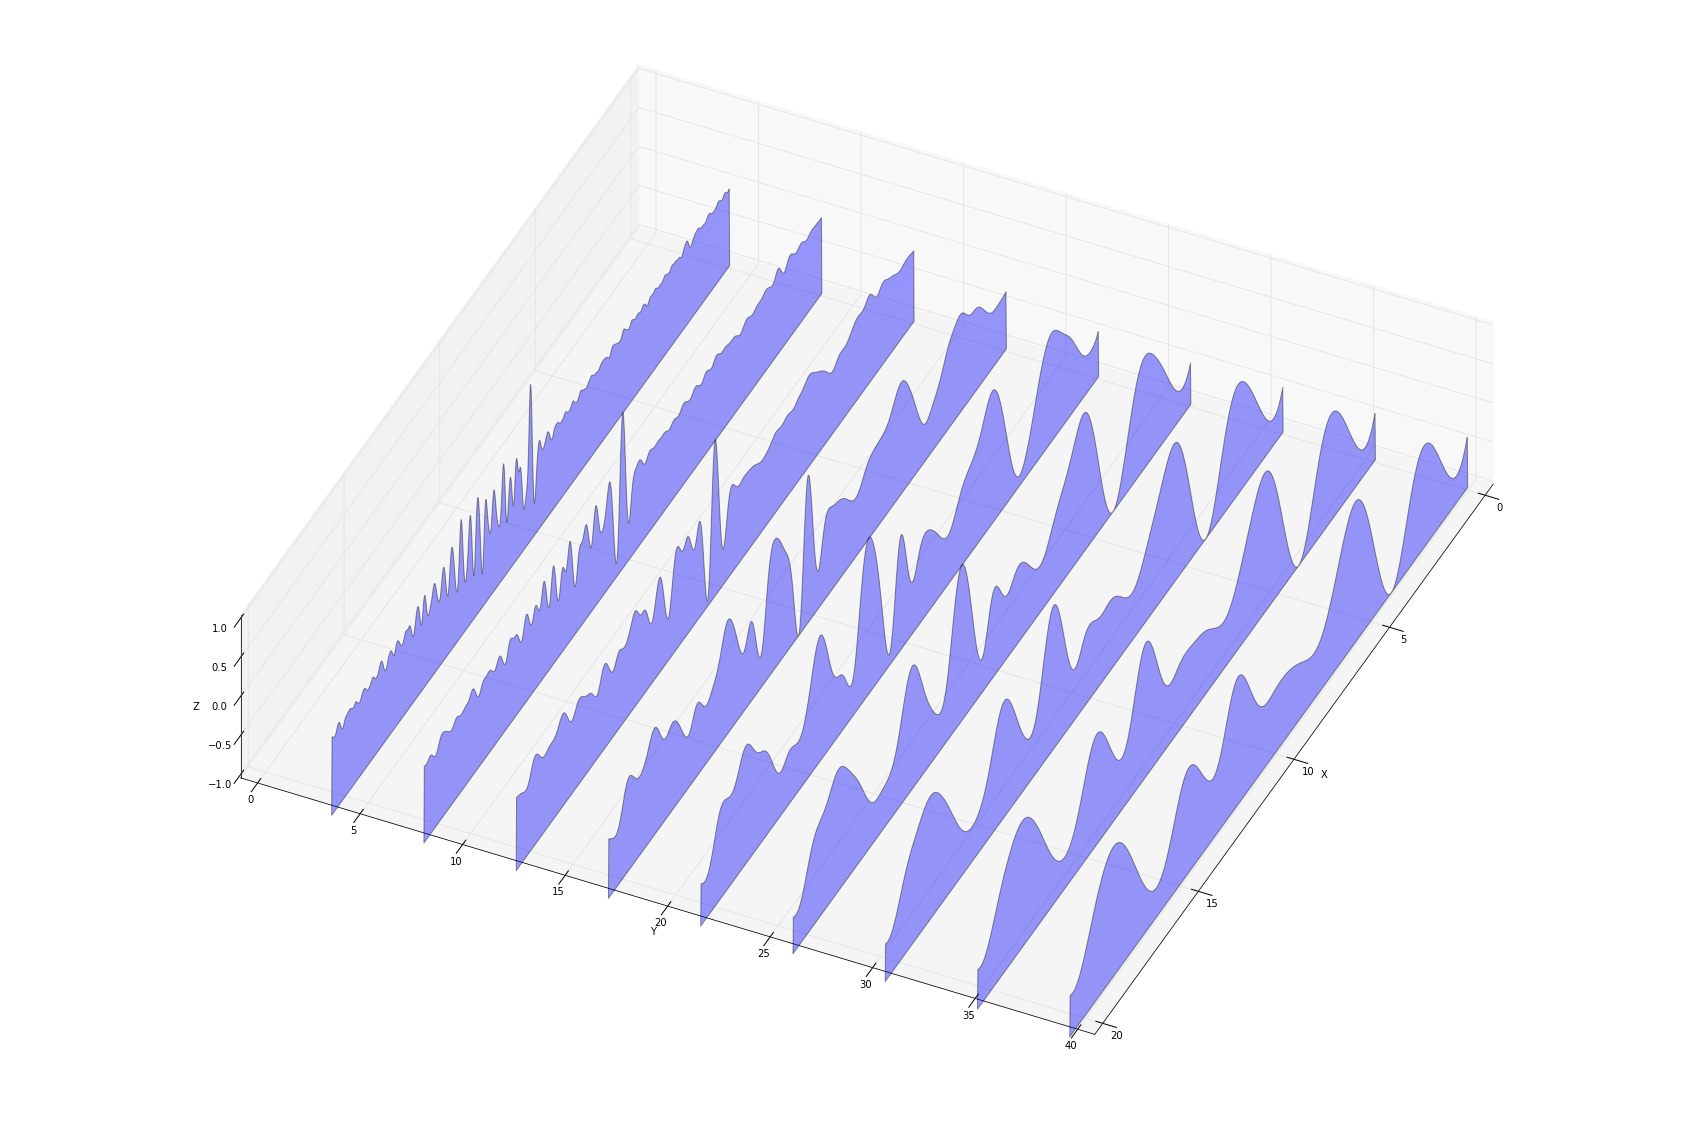

In [89]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

from mpl_toolkits.mplot3d import proj3d
def orthogonal_proj(zfront, zback):
    a = (zfront+zback)/(zfront-zback)
    b = -2*(zfront*zback)/(zfront-zback)
    return np.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,a,b],
                        [0,0,0,zback]])
proj3d.persp_transformation = orthogonal_proj

fig = plt.figure(figsize= (30,20))
ax = fig.gca(projection='3d')

def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.6)

verts = []
for ii in range(len(widths)):
    ys = cwtmatr[ii][3500:4500]/max(abs(cwtmatr[ii][3500:4500]))
    ys[0], ys[-1] = -1, -1                                  
                                      
    verts.append(list(zip(time[0:2000],ys)))

poly = PolyCollection(verts,facecolors=[cc('b'), cc('b'), cc('b'),cc('b')])
poly.set_alpha(0.4)
ax.add_collection3d(poly, zs=widths, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 20)
ax.set_ylabel('Y')
ax.set_ylim3d(-0, 40)
ax.set_zlabel('Z')
ax.set_zlim3d(-1, 1)

ax.view_init(elev=75., azim=25)

plt.savefig('waterfall.pdf',format = 'pdf')

In [ ]:
fig1 = plt.figure(figsize= (6,3))

plt.imshow(cwtmatr, interpolation='none', extent=[0,1000/Fs*len(snippet),1000/Fs*max(widths),0], cmap=plt.cm.gist_heat, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlim((0,300))
plt.xlabel('Time (ms)',fontsize = 12)
plt.ylabel('Wavelet Widths (ms)',fontsize = 12)
plt.title('Continuous Wavelet Transform')
plt.grid()

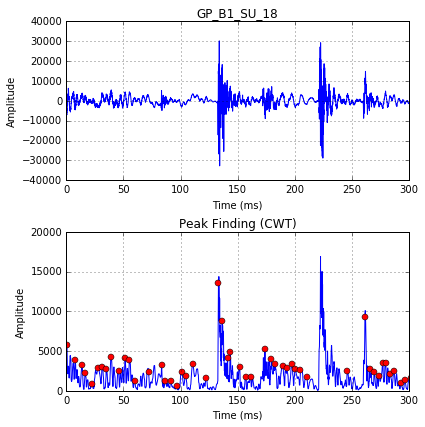

In [42]:
#trys built in function
b = signal.medfilt(abs(snippet), kernel_size=41)

peakInd = signal.find_peaks_cwt(b,widths,noise_perc=.1,min_length=60)

fig = plt.figure(figsize= (6,6))

plt.subplot(2,1,1)
plt.plot(time,snippet,'b') # milliseconds
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.xlim((0,300))
plt.title(names[3])
plt.grid()

plt.subplot(2,1,2)
plt.plot(time,b,'b')
plt.plot(time[peakInd],b[peakInd],'ro')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Peak Finding (CWT)')
plt.xlim((0,300))
plt.ylim((0,20000))
plt.grid()

fig.tight_layout() 

plt.savefig('peakFind.pdf',format = 'pdf')

In [ ]:
offsets = autoS.find_offset(cDataset,names[0],names[1:])
print(offsets) # prints the offsets in counts

In [ ]:
rawDataset = cDataset
sDataset = autoS.sync_dataset(rawDataset,names)

In [ ]:
cDataset = rawDataset

In [ ]:
Fs = 48000

fig = plt.figure(figsize = (8,4), dpi = 800)


name1 = 'GP_B1_NL_18'
name2 = 'GP_B2_SL_18'

plt.subplot(2,1,1)
plt.plot(1/Fs*np.linspace(1,len(cDataset[name1][:,0]),len(cDataset[name1][:,0])) ,  abs(cDataset[name1][:,0]),'b')
plt.plot(1/Fs*np.linspace(1,len(cDataset[name2][:,0]),len(cDataset[name2][:,0])) , -abs(cDataset[name2][:,0]),'r')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((5,45))
plt.title('Raw Audio Signals')
plt.grid()

plt.subplot(2,1,2)
plt.plot(1/Fs*np.linspace(1,len(sDataset[name1][:,0]),len(sDataset[name1][:,0])) ,  abs(sDataset[name1][:,0]),'b')
plt.plot(1/Fs*np.linspace(1,len(sDataset[name2][:,0]),len(sDataset[name2][:,0])) , -abs(sDataset[name2][:,0]),'r')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((5,45))
plt.title('Synchronized Audio Signals')
plt.grid()

fig.tight_layout()


#plt.savefig('sync.pdf',format = 'pdf', transparent = True)


In [ ]:
thisrange = range(1660000,1690000)

channel = abs(sDataset[name1][:,0])
filtChannel = signal.medfilt(channel, kernel_size=11)

In [ ]:
fig = plt.figure(figsize = (8,6))

plt.subplot(3,1,1)
plt.plot(1/Fs*np.linspace(1,len(channel),len(channel)) ,  channel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Raw Audio Signal')
plt.grid()

plt.subplot(3,1,2)
plt.plot(1/Fs*np.linspace(1,len(filtChannel),len(filtChannel)) ,  filtChannel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Median Filtered Signal')
plt.grid()

plt.subplot(3,1,3)
plt.plot(1/Fs*np.linspace(1,len(filtChannel),len(filtChannel)) ,  channel-filtChannel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Difference')
plt.grid()

fig.tight_layout()

plt.savefig('median.pdf',format = 'pdf', transparent = True)

In [ ]:
fig = plt.figure(figsize = (8,6))

for ii in range()

plt.subplot(3,1,1)
plt.plot(1/Fs*np.linspace(1,len(channel),len(channel)) ,  channel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Raw Audio Signal')
plt.grid()

plt.subplot(3,1,2)
plt.plot(1/Fs*np.linspace(1,len(filtChannel),len(filtChannel)) ,  filtChannel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Median Filtered Signal')
plt.grid()

plt.subplot(3,1,3)
plt.plot(1/Fs*np.linspace(1,len(filtChannel),len(filtChannel)) ,  channel-filtChannel,'b')
plt.xlabel('Time (sec)',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.xlim((35,40))
plt.ylim((0,35000))
plt.title('Difference')
plt.grid()

fig.tight_layout()

In [ ]:
plt.subplot(1,2,1)
Pxx, freqs, bins, im = plt.specgram(sDataset[names[ii]][:,0], NFFT=1024, Fs=48000, noverlap=512, cmap=plt.cm.gist_heat)

plt.subplot(1,2,2)
f, t, Sxx = signal.spectrogram(sDataset[names[ii]][:,0], Fs,nperseg = 1024, noverlap = 256,nfft = 1024)
plt.pcolormesh(t, f, 10*np.log10(specMat[0,:].reshape(Sxx.shape[0],Sxx.shape[1])),cmap = plt.cm.gist_heat)

In [ ]:
specMat = []

for ii in range(0,len(names)):
    plt.subplot(1,2,1)
    Sxx, freqs, bins, im = plt.specgram(sDataset[names[ii]][:,0], NFFT=1024, Fs=48000, noverlap=512, cmap=plt.cm.gist_heat)
    #f, t, Sxx = signal.spectrogram(sDataset[names[ii]][:,0], Fs,nperseg = 1024, noverlap = 256)
    specMat.append(Sxx.reshape(Sxx.shape[0]*Sxx.shape[1]))
    
specMat = np.array(specMat)
print(specMat.shape)


plt.subplot(1,2,2)
plt.pcolormesh(bins, freqs, 10*np.log10(specMat[0,:].reshape(Sxx.shape[0],Sxx.shape[1])),cmap = plt.cm.gist_heat)

In [ ]:
pca = dcmp.PCA(n_components = len(sDataset.keys()))
pca.fit(specMat)
plt.plot(pca.explained_variance_ratio_,linestyle = 'None',marker = 'o') 

In [ ]:
plt.figure(figsize = (20,20))

for ii in range(5,9):
    plt.subplot(2,2,ii-4)
    qq = abs(pca.components_[ii,:].real.reshape(Sxx.shape[0],Sxx.shape[1]))
    plt.pcolormesh(bins, freqs, 10*np.log10(qq),cmap = plt.cm.gist_heat)
    plt.xlim((35,45))
    plt.ylim((0,15000))

In [ ]:
#converts dictionary a numpy array for sklearn operations. Takes only the 1st channel of the stereo sound.
x = np.zeros((len(sDataset.keys()),len(sDataset[names[0]][:,0])),dtype='i2',order='C')
count = 0;

for ii in range(0,len(names)):
    x[ii,:]= sDataset[names[ii]][:,0]

In [ ]:
pca = dcmp.PCA(n_components = len(sDataset.keys()))
pca.fit(x)
plt.plot(pca.explained_variance_ratio_,linestyle = 'None',marker = 'o') 

In [ ]:
fig = plt.figure(figsize= (4,6))
for ii in range(3):
    plt.subplot(3,1,ii+1)
    plt.plot(1/Fs*np.linspace(1,len(pca.components_[ii,:]),len(pca.components_[ii,:])),pca.components_[ii,:],'b')
    plt.xlim((30,50))
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude')
    plt.title('PCA component ' + str(ii+1))
    plt.grid()
    
fig.tight_layout()  

plt.draw()
    
plt.savefig('pca.pdf',format = 'pdf', transparent = True)

In [ ]:
b, a = signal.butter(4, 20./48000, 'low')

y = []

for name in names:
    y.append(signal.filtfilt(b, a, abs(sDataset[name][:,0])))
    
    
y = np.array(y)


plt.subplot(2,1,2)
plt.plot(y[0,:],'r')
   

In [ ]:
y.shape[0]

In [ ]:
plt.figure(figsize=(4,20))

for ii in range(y.shape[0]):
    plt.subplot(y.shape[0],1,ii+1)
    plt.plot(y[ii,:],'r')

In [ ]:
ica = dcmp.FastICA(n_components = 8)
ica.fit(x)

In [ ]:
print(sum(y[0,:]-y[1,:]))
print(sum(y[1,:]-y[2,:]))
print(sum(y[2,:]-y[3,:]))

In [ ]:
fig = plt.figure(figsize= (4,6))
for ii in range(3):
    plt.subplot(3,1,ii+1)
    plt.plot(1/Fs*np.linspace(1,len(ica.components_[ii,:]),len(ica.components_[ii,:])),ica.components_[ii,:],'b')
    plt.xlim((30,50))
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude')
    plt.title('ICA Component ' + str(ii+1))
    plt.grid()
    
fig.tight_layout()  

plt.draw()

plt.savefig('ica.pdf',format = 'pdf', transparent = True)